## SARSA
### 参考にしたコードのリンク
[参考にしたコード](https://github.com/matsumotokoki/RL-Maze "RL-Maze")

### 参考にした部分
- map.py:マップの作り方・表示方法
- agent.py:エージェントの状態を返す関数の作り方
- q-learning.py:Q学習の式・学習の仕方・報酬の与え方

## 変更点
### map.py
| 何行目か       | 変更点                       | 説明                          | 
| -------------- | ---------------------------- | ----------------------------- | 
| 15行目〜27行目 | マップの拡張                 | (11,11)→(12,12)              | 
| 30行目〜32行目 | ゴールの増設                 | ゴール1つ→ゴール3つ          | 
| 68行目〜81行目 | ゴール, 凸凹通路の表示を追加 | 3つのゴール, 凸凹通路の可視化 | 

### agent.py
| 何行目か       | 変更点         | 説明                                               |
| -------------- | -------------- | -------------------------------------------------- |
| 2行目          | 引数の追加     | 増やしたゴールの座標を追加                         |
| 29行目〜32行目 | 終了判定の追加 | 増やしたゴールに着いた時に終了判定を返すように追加 |

### sarsa.ipynb
| 何行目か       | 変更点     | 説明                                                                                                                                                       | 
| -------------- | ---------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- | 
| 32行目〜59行目 | 報酬の変更 | エージェントがいるマスを座標に変換(3つのゴールでそれぞれ報酬が違うため),凸凹通路を定義, 凸凹通路を通った時の報酬, 増やしたゴールに辿り着いた際の報酬を定義 | 
| 74行目         | 引数の追加 | map.pyの Class Map で作成した地図を使用するために呼び出す            


In [1]:
import numpy as np
from map import Map
from agent import Agent

In [3]:
class sarsa(object):
    def __init__(self):
        self.map = Map()
        self.agent = Agent()
        self.max_episode = 100
        self.steps = 300
        self.gamma = 0.9
        self.alpha = 0.8
        self.q_table = np.random.uniform(low=-1,high=1,\
                                    size=(self.map.size**2,self.agent.action_space))

    def decide_action(self,next_state,episode,q_table):
        first_probability = 0.75
        epsilon = first_probability * (1/(episode+1))
        if epsilon <= np.random.uniform(0,1):
            next_action = np.argmax(q_table[next_state])   
        else:
            prob = sum(q_table[next_state]+100) 
            w = (q_table[next_state]+100) / prob
            next_action = np.random.choice(range(4) ,p=w)  
        return next_action

    def update(self,q_table,state,action,reward,next_state,next_action):
        q_table[state, action] = (1 - self.alpha) * q_table[state, action] \
                                  + self.alpha *(reward + self.gamma * q_table[next_state, next_action])
        return q_table

    def reward(self,done,state,next_state,_map):
        boko = []
        for i in range(_map.shape[0]):
            for j in range(_map.shape[1]):
                if _map[12-j][i] == 3:
                    boko.append([12-j,i])

        state_ = [state//13,state%13]
        next_state_ = [next_state//13,next_state%13]

        for boko_ in boko:
            if state_ == boko_:
                reward = -30
                break
            else:
                reward = 30

        if done and next_state_ ==[11,11] :
            reward = 150
        elif done and next_state_ == [11,2]:
            reward = 70
        elif done and next_state_ == [6,11]:
            reward = 40
        elif state == next_state:
            reward = -10
        else:
            reward = -1
        return reward


    def run(self):
        for episode in range(self.max_episode):
            self.agent = Agent(self.map.init_pos)
            state = self.agent.get_state()
            action = np.argmax(self.q_table[state]) 
            reward_of_episode = 0

            for i in range(self.steps):
                direction = self.map.chack_movable(self.agent.pos) 
                self.agent.action(action,direction)
                done = self.agent.check_done()
                next_state = self.agent.get_state()
                reward = self.reward(done,state,next_state,self.map.map) 
                reward_of_episode += reward
                next_action = self.decide_action(next_state,episode,self.q_table)
                self.q_table = self.update(self.q_table,state,action,reward,next_state,next_action)
                action = next_action
                state = next_state
                
                self.map.plot(self.agent.pos,self.q_table)
                if done:
                    break
            print("episode %5d, reward %6d, step %5d" %(episode+1,reward_of_episode,i+1))

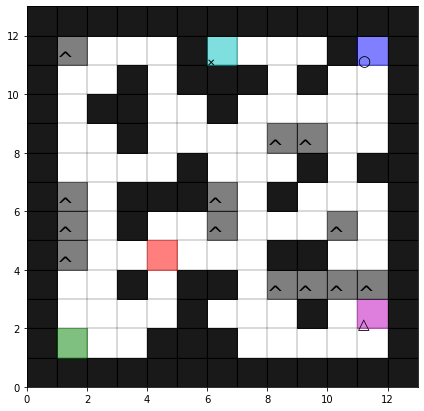

KeyboardInterrupt: 

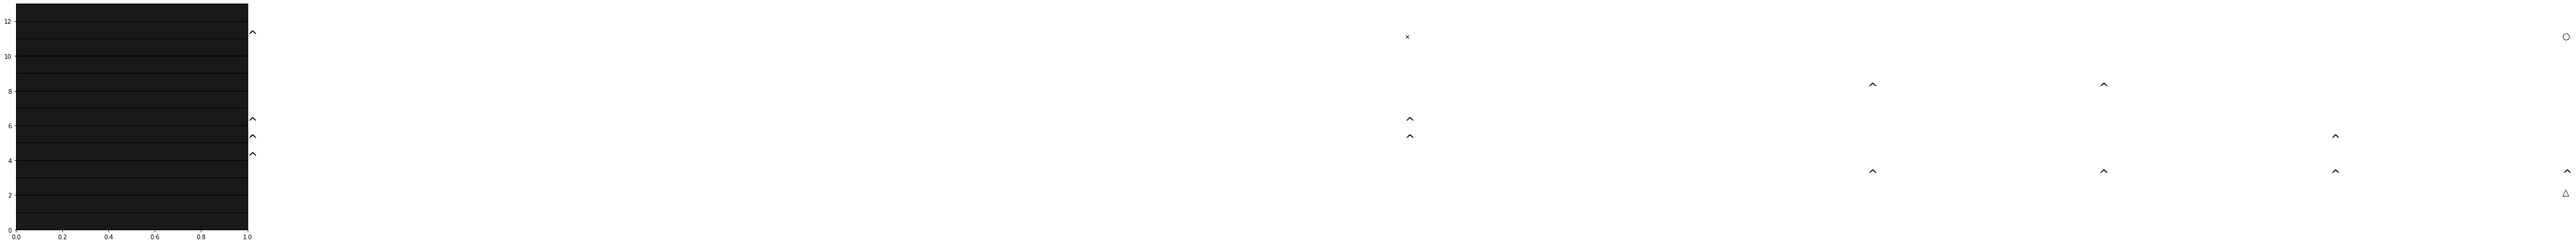

In [4]:
if __name__ == "__main__":
   sarsa().run() 